In [1]:
import neurokit2 as nk
import pandas as pd
import numpy as np

## EKG

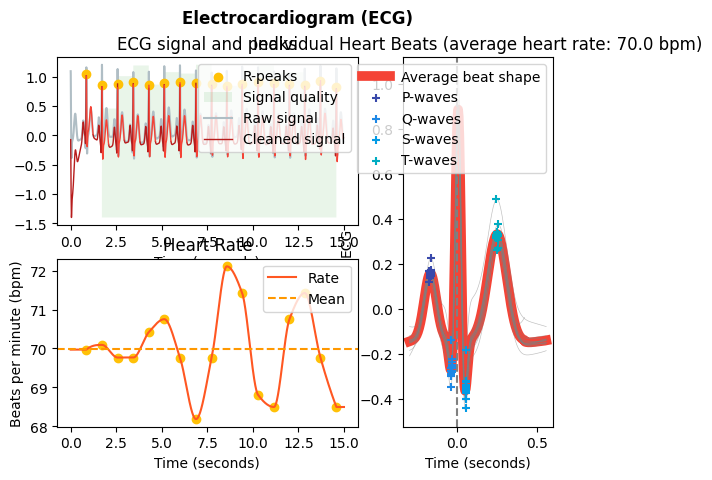

In [7]:
# Generate 15 seconds of ECG signal (recorded at 250 samples/second)
ecg = nk.ecg_simulate(duration=15, sampling_rate=250, heart_rate=70)

# Process it
signals, info = nk.ecg_process(ecg, sampling_rate=250)

# Visualise the processing
nk.ecg_plot(signals, info)

In [8]:
import pandas as pd
import numpy as np

df = pd.read_excel("BrainFlow-RAW_2025-11-25_export_data_0.xlsx")

# Extract column 2 (index 1), starting from row 2 (index 1)
ppg_col = df.iloc[1:, 1]

# Option 1: pandas Series
ppg_signal_series = ppg_col.dropna()

# Option 2: NumPy array
ppg_signal_np = ppg_col.dropna().to_numpy()

# Option 3: Python list
ppg_signal_list = ppg_col.dropna().tolist()


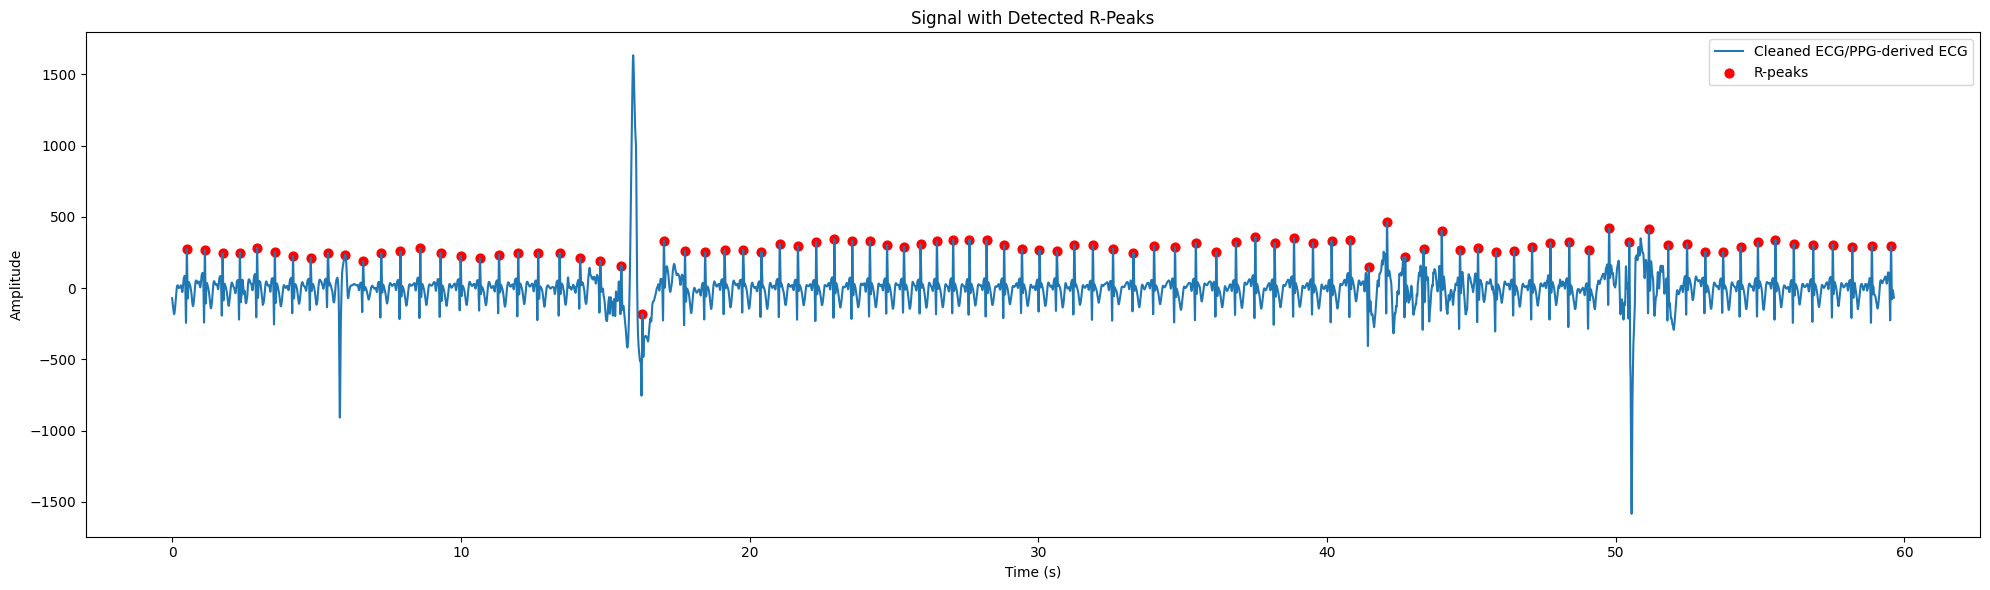

In [10]:
# Process it
signals, info = nk.ecg_process(ppg_signal_list, sampling_rate=250)

# Visualise the processing
# nk.ecg_plot(signals, info)

import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np

# signals, info = nk.ecg_process(ppg_signal_list, sampling_rate=250)

# Extract the processed ECG signal and R-peaks
ecg_clean = signals["ECG_Clean"]
rpeaks = info["ECG_R_Peaks"]

# Create time axis in seconds
sampling_rate = 250
duration = len(ecg_clean) / sampling_rate
time = np.linspace(0, duration, len(ecg_clean))

# Plot
plt.figure(figsize=(20, 6))
plt.plot(time, ecg_clean, label="Cleaned ECG/PPG-derived ECG")

# Overlay R-peaks
plt.scatter(time[rpeaks], ecg_clean[rpeaks], color="red", s=40, label="R-peaks")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signal with Detected R-Peaks")
plt.legend()
plt.tight_layout()
plt.show()


## PPG

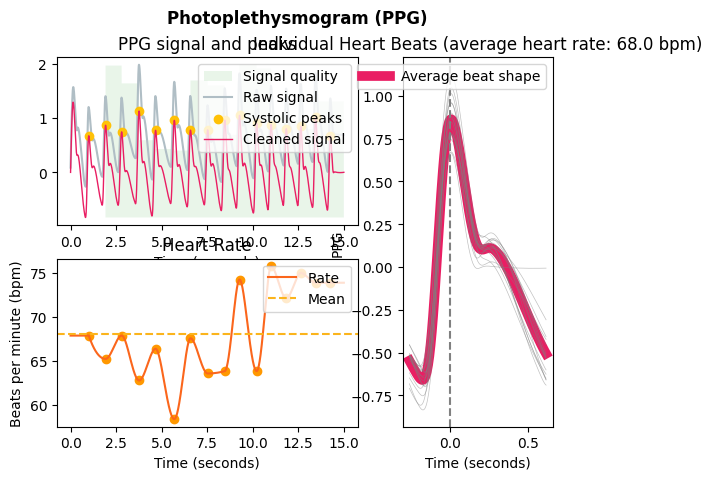

In [6]:
# Generate 15 seconds of PPG signal (recorded at 250 samples/second)
ppg = nk.ppg_simulate(duration=15, sampling_rate=250, heart_rate=70)

# Process it
signals, info = nk.ppg_process(ppg, sampling_rate=250)

# Visualize the processing
nk.ppg_plot(signals, info)

       PPG_Raw  PPG_Clean   PPG_Rate  PPG_Quality  PPG_Peaks
0          523  -0.564671  76.477325     0.968944          0
1          522  -0.630457  76.477325     0.968944          0
2          522  -0.818438  76.477325     0.968944          0
3          520  -1.253243  76.477325     0.968944          0
4          519  -2.068170  76.477325     0.968944          0
...        ...        ...        ...          ...        ...
17532      499  -5.846425  83.720930     0.985938          0
17533      496  -6.290954  83.720930     0.985938          0
17534      497  -5.284102  83.720930     0.985938          0
17535      498  -3.004503  83.720930     0.985938          0
17536      501   0.042684  83.720930     0.985938          0

[17537 rows x 5 columns]
   PPG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0      76.503416  784.546271  84.216202    51.42041   69.012876         NaN   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD  ...  HRV_SampEn  HRV_ShanEn  \
0 

c:\Users\gur15\miniconda3\envs\capstone\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:536: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\gur15\miniconda3\envs\capstone\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:536: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\gur15\miniconda3\envs\capstone\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:536: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum

     Time_sec      RMSSD
0   15.000000  35.408385
1   45.000000  30.429031
2   75.000000  38.832158
3  105.000000  35.203924
4  135.000000  50.395263
5  165.000000  43.920523
6  195.000000  45.319665
7  225.000000  53.013748
8  255.000000  39.399081
9  281.141667  47.815529


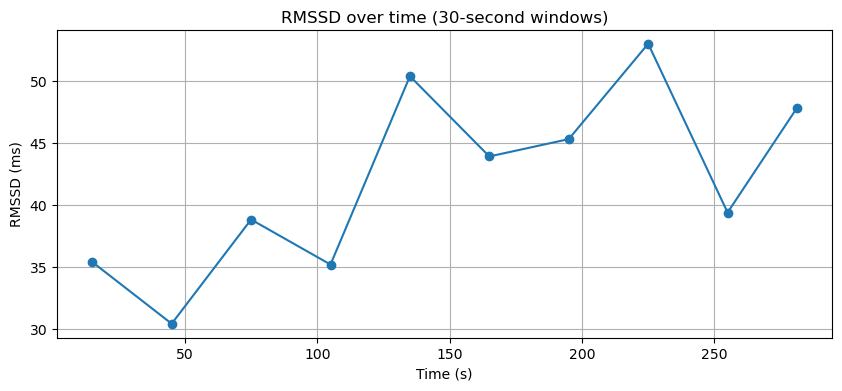

In [4]:
import pandas as pd

df = pd.read_csv("parsed_data.csv")
ppg = df["PPGSignal"].dropna().values
import neurokit2 as nk

signals, info = nk.ppg_process(ppg, sampling_rate=60)

print(signals)

hrvstuff = nk.ppg_intervalrelated(signals, sampling_rate=60)

print(hrvstuff)
# ibi = nk.ppg_interval(info)

# hrv = nk.hrv(ibi, sampling_rate=100, show=True)
# print(hrv)

import pandas as pd
import numpy as np

# Window size
window_size = 30 * 60  # 30 seconds at 60 Hz

# Number of windows
n_windows = int(np.ceil(len(signals) / window_size))

# Store RMSSD
rmssd_list = []
time_list = []

for i in range(n_windows):
    start = i * window_size
    end = min((i+1) * window_size, len(signals))
    window = signals.iloc[start:end]
    
    # Compute HRV for this window
    window_hrv = nk.ppg_intervalrelated(window, sampling_rate=60)
    
    # RMSSD is in 'HRV_RMSSD' column
    rmssd = window_hrv['HRV_RMSSD'].values[0]
    rmssd_list.append(rmssd)
    
    # Time point (middle of window, in seconds)
    mid_time = (start + end) / 2 / 60  # convert samples → seconds
    time_list.append(mid_time)

rmssd_df = pd.DataFrame({
    'Time_sec': time_list,
    'RMSSD': rmssd_list
})

print(rmssd_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(rmssd_df['Time_sec'], rmssd_df['RMSSD'], marker='o')
plt.xlabel('Time (s)')
plt.ylabel('RMSSD (ms)')
plt.title('RMSSD over time (30-second windows)')
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np

# Window size
window_size = 30 * 60  # 30 seconds at 60 Hz

# Number of windows
n_windows = int(np.ceil(len(signals) / window_size))

# Store RMSSD
rmssd_list = []
time_list = []

for i in range(n_windows):
    start = i * window_size
    end = min((i+1) * window_size, len(signals))
    window = signals.iloc[start:end]
    
    # Compute HRV for this window
    window_hrv = nk.ppg_intervalrelated(window, sampling_rate=60)
    
    # RMSSD is in 'HRV_RMSSD' column
    rmssd = window_hrv['HRV_RMSSD'].values[0]
    rmssd_list.append(rmssd)
    
    # Time point (middle of window, in seconds)
    mid_time = (start + end) / 2 / 60  # convert samples → seconds
    time_list.append(mid_time)

rmssd_df = pd.DataFrame({
    'Time_sec': time_list,
    'RMSSD': rmssd_list
})

print(rmssd_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(rmssd_df['Time_sec'], rmssd_df['RMSSD'], marker='o')
plt.xlabel('Time (s)')
plt.ylabel('RMSSD (ms)')
plt.title('RMSSD over time (30-second windows)')
plt.grid(True)
plt.show()


## HRV

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,...,60.0,0.891502,660.0,740.0,14.651163,49.302326,470.0,1420.0,7.962963,234.375


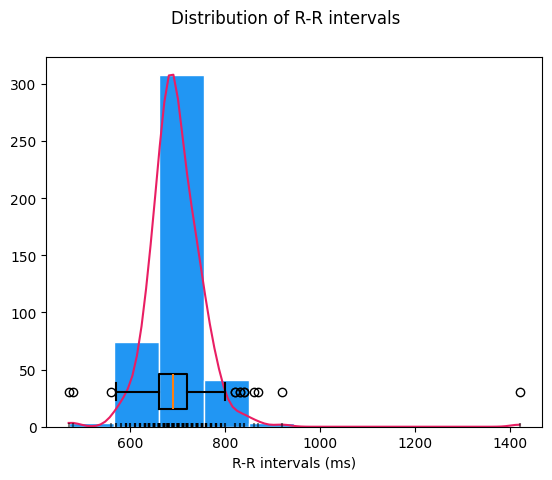

In [8]:
data = nk.data("bio_resting_5min_100hz")
data.head()  # Print first 5 rows

# Find peaks
peaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

# Extract clean EDA and SCR features
hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_time